# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from matplotlib import pyplot as plt

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [34]:

#cities_test = ["Paris", "London", "Gretel", "Beijing"]
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
name = []
i = 0

#Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    if i % 50 == 0:
        time.sleep(5)

    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        i = i + 1
        print(f"recorded {i}: {city}")
        
    except KeyError: 
        print(f"{city} city not found")


#print(response)

#print(f"The latitude is: {lat}")
#print(f"The lon is: {lng}") 
#print(f"The temp is: {temp}") 
#print(f"The max temp is: {max_temp}")
#print(f"The humidity is: {humidity}")
#print(f"The cloudiness is: {cloudiness}")
#print(f"The wind speed is: {wind_speed}")
#print(f"The country is: {country}")
#print(f"The date is: {date}")

belushya guba city not found
recorded 1: longyearbyen
recorded 2: itarema
recorded 3: new norfolk
recorded 4: rikitea
recorded 5: barrow
recorded 6: avarua
recorded 7: albany
karamay city not found
recorded 8: komsomolskiy
recorded 9: la ronge
recorded 10: oranjemund
recorded 11: bluff
recorded 12: bethel
recorded 13: faya
ramasukha city not found
recorded 14: saldanha
recorded 15: port-gentil
recorded 16: georgetown
recorded 17: ushuaia
recorded 18: mayumba
recorded 19: sinop
recorded 20: narrabri
recorded 21: ribeira grande
recorded 22: saint anthony
recorded 23: norman wells
recorded 24: tuktoyaktuk
recorded 25: constitucion
recorded 26: provideniya
umzimvubu city not found
recorded 27: vaini
recorded 28: mataura
mys shmidta city not found
recorded 29: busselton
illoqqortoormiut city not found
recorded 30: damienesti
recorded 31: cape town
recorded 32: thompson
recorded 33: ucluelet
recorded 34: carnarvon
recorded 35: goure
recorded 36: miles city
samusu city not found
recorded 37: 

recorded 325: hobyo
recorded 326: naze
recorded 327: kudahuvadhoo
recorded 328: merauke
recorded 329: maraa
recorded 330: yarmouth
recorded 331: port-cartier
recorded 332: fare
recorded 333: ipixuna
recorded 334: vostok
recorded 335: nantucket
recorded 336: ojinaga
recorded 337: fuyu
recorded 338: ballina
recorded 339: takoradi
recorded 340: bahia honda
recorded 341: anadyr
recorded 342: haicheng
recorded 343: buncrana
urdzhar city not found
recorded 344: barguzin
recorded 345: lazaro cardenas
recorded 346: zinacantan
recorded 347: sangar
recorded 348: zharkent
recorded 349: sembe
recorded 350: julio de castilhos
recorded 351: novaya igirma
recorded 352: itupiranga
recorded 353: lavrentiya
recorded 354: asfi
ksenyevka city not found
recorded 355: isangel
recorded 356: mount gambier
recorded 357: alasehir
recorded 358: fort nelson
recorded 359: darnah
recorded 360: kambove
recorded 361: labuhan
recorded 362: palana
recorded 363: koutiala
recorded 364: boa vista
recorded 365: grand gaube

In [35]:
d = datetime.utcfromtimestamp(1602900138)

print(d)

2020-10-17 02:02:18


## Convert Raw Data to DataFrame
* Save as csv

In [36]:
weather_data_df = pd.DataFrame({"City": name, "Latitude": lat, "Longitude": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})
#weather_data_df["Date"] = weather_data_df(datetime.utcfromtimestamp["Date"])

                                      
weather_data_df.to_csv(output_data_file, index=False)
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,19.40,79,20,8.05,SJ,1602971102
1,Itarema,-2.92,-39.92,79.39,78,81,15.48,BR,1602971121
2,New Norfolk,-42.78,147.06,46.99,91,55,1.01,AU,1602971121
3,Rikitea,-23.12,-134.97,74.21,80,100,20.98,PF,1602971121
4,Barrow,71.29,-156.79,17.60,78,1,12.75,US,1602970832


In [37]:
#re-add date as CSV file 
file = "../output_data/cities.csv"

cities_df = pd.read_csv(file)
cities_df.head()


#cities_df = pd.to_datetime(cities_df['Date'],unit='ms',origin='unix')



,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,19.40,79,20,8.05,SJ,1602971102
1,Itarema,-2.92,-39.92,79.39,78,81,15.48,BR,1602971121
2,New Norfolk,-42.78,147.06,46.99,91,55,1.01,AU,1602971121
3,Rikitea,-23.12,-134.97,74.21,80,100,20.98,PF,1602971121
4,Barrow,71.29,-156.79,17.60,78,1,12.75,US,1602970832


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

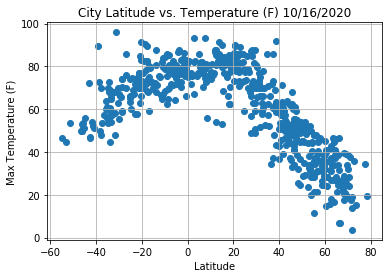

In [38]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Temperature (F) 10/16/2020")
plt.grid()

plt.savefig('../output_data/lat_temp.png')
plt.show()


### Latitude vs. Humidity Plot

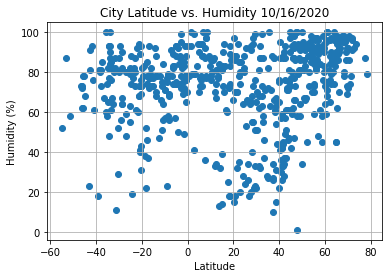

In [40]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 10/16/2020")
plt.grid()

plt.savefig('../output_data/humidity.png')
plt.show()


### Latitude vs. Cloudiness Plot

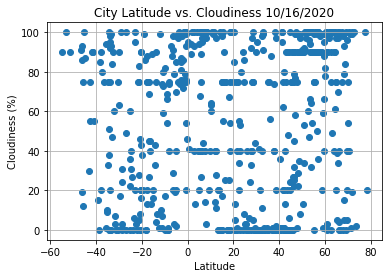

In [41]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 10/16/2020")
plt.grid()

plt.savefig('../output_data/cloudiness.png')
plt.show()


### Latitude vs. Wind Speed Plot

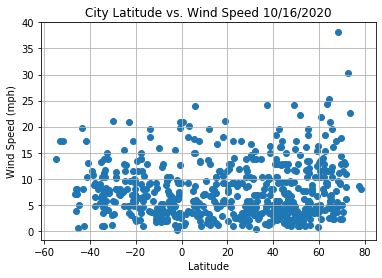

In [42]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed 10/16/2020")
plt.grid()

plt.savefig('../output_data/wind_speed.png')
plt.show()


## Linear Regression

### Write linear regression plot function (optional)

In [43]:
# #x_values = (cities_df[])
# #y_values = (cities_df[])

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# # plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# # plt.xlabel("")
# # plt.ylabel("")
# # plt.title("")

# plt.show()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8791951481717225


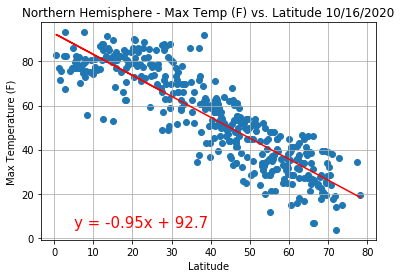

In [44]:
north_lat = cities_df.loc[(cities_df['Latitude'] > 0)]
#north_lat.head()


x_values = (north_lat["Latitude"])
y_values = (north_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/north_lat_temp.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.697626479257061


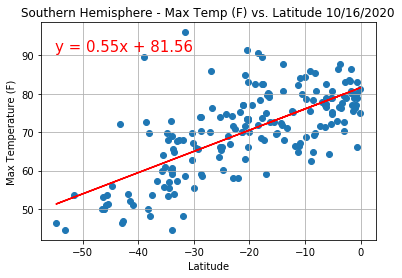

In [45]:
south_lat = cities_df.loc[(cities_df['Latitude'] < 0)]
#south_lat.head()


x_values = (south_lat["Latitude"])
y_values = (south_lat["Max Temp"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,91),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/south_lat_temp.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.22103883809665867


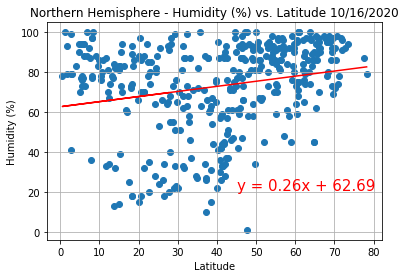

In [46]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/north_humidity.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10558899486755254


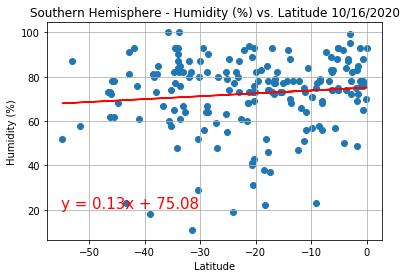

In [47]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/south_humidity.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.15773944204316104


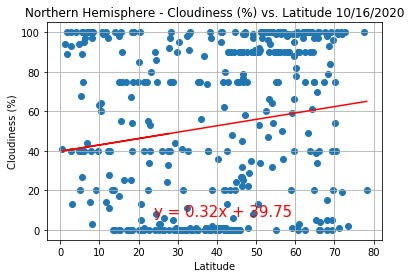

In [48]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(24,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/north_cloudiness.png')
print(f"The r value is: {rvalue}")
plt.show()



###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.07523385468096071


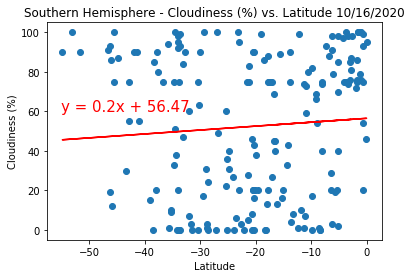

In [59]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude 10/16/2020")

plt.grid
plt.savefig('../output_data/south_cloudiness.png')
print(f"The r value is: {rvalue}")
plt.show()


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.1067741593452961


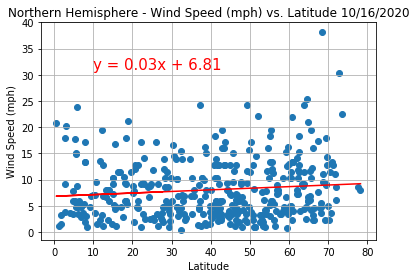

In [50]:
x_values = (north_lat["Latitude"])
y_values = (north_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,31),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/north_wind.png')
print(f"The r value is: {rvalue}")
plt.show()


###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.20313980269392296


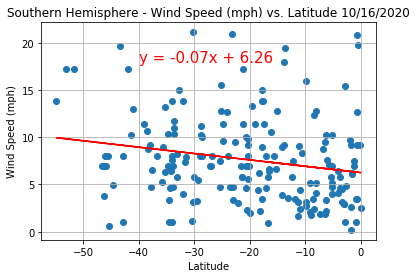

In [55]:
x_values = (south_lat["Latitude"])
y_values = (south_lat["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-40,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude 10/16/2020")

plt.grid()
plt.savefig('../output_data/south_wind.png')
print(f"The r value is: {rvalue}")
plt.show()

